# UFO Sightings Analysis
## Tiffany Objectives/To Do:

**Due **
-  <br>
-  <br>
-  <br><br>

**Due **
-  <br><br>

**Due **
- PowerPoint <br><br>

**Due 4/18** 
- Presentation <br><br>


## Project Description
<br>

**Research Questions:**
1. "Which states in the USA have the highest and lowest numbers of reported UFO sightings?
2. In comparison to other countries worldwide, how does the frequency of UFO sightings in the USA stand?
3. Among all the UFO sightings reported in the USA, which UFO shape is the most frequently observed?




In [1]:
import pandas as pd
import requests as rs
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup# as soup
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [2]:
# Initialize Chrome webdriver
driver = webdriver.Chrome() 
base_url = "https://nuforc.org/subndx/?id=all"
driver.get(base_url)

# Initialize lists to store headers and data
headers = []
data = []

# Need to Loop through all website pages
while True:
    # Get the current page HTML
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    # Table Data
    table = soup.find('table')
    if not headers:  # Need this because only need the headers once as they are the same
        headers = [th.text.strip() for th in table.find_all('th')]

    # Data rows
    data_rows = table.find_all('tr')[1:]  # This Skips the header row
    for row in data_rows:
        data.append([td.text.strip() for td in row.find_all('td')])  # Include all columns

    # Need to wait for the next button
    next_button = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, "table_1_next"))
    )

#     # Check if the next button is disabled
    if 'disabled' in next_button.get_attribute('class'):
        break  # Break loop if next button is disabled

    # Click the next button
    next_button.click()

# Close the webdriver
driver.quit()

# Due to the amount of pages on the website, this cell will take some time to run
# there will be an 'ElementClickInterceptedException' you can bypass and run the next cell

ElementClickInterceptedException: Message: element click intercepted: Element <a class="paginate_button next" aria-controls="table_1" data-dt-idx="8" tabindex="0" id="table_1_next">...</a> is not clickable at point (1471, 632). Other element would receive the click: <a aria-label="Scroll to the top of the page" href="#" id="scroll-top" class="scroll-top-right" style="opacity: 1; display: block;">...</a>
  (Session info: chrome=123.0.6312.107)
Stacktrace:
	GetHandleVerifier [0x00007FF668A2AAF2+58082]
	(No symbol) [0x00007FF66899FDB2]
	(No symbol) [0x00007FF668854135]
	(No symbol) [0x00007FF6688A08C0]
	(No symbol) [0x00007FF66889E6EB]
	(No symbol) [0x00007FF66889BEF4]
	(No symbol) [0x00007FF66889AC85]
	(No symbol) [0x00007FF66888F5D8]
	(No symbol) [0x00007FF6688BBAEA]
	(No symbol) [0x00007FF66888EEDA]
	(No symbol) [0x00007FF6688BBD00]
	(No symbol) [0x00007FF6688D8061]
	(No symbol) [0x00007FF6688BB893]
	(No symbol) [0x00007FF66888D278]
	(No symbol) [0x00007FF66888E311]
	GetHandleVerifier [0x00007FF668DA49BD+3703213]
	GetHandleVerifier [0x00007FF668DFDF2D+4069149]
	GetHandleVerifier [0x00007FF668DF61DF+4037071]
	GetHandleVerifier [0x00007FF668AC9A96+709254]
	(No symbol) [0x00007FF6689AC0FF]
	(No symbol) [0x00007FF6689A72D4]
	(No symbol) [0x00007FF6689A742C]
	(No symbol) [0x00007FF668996F34]
	BaseThreadInitThunk [0x00007FFA44D9257D+29]
	RtlUserThreadStart [0x00007FFA45BEAA48+40]


In [3]:
df = pd.DataFrame(data,columns=headers)
df.head()

,Link,Occurred,City,State,Country,Shape,Summary,Reported,Posted,Media
0,Open,02/02/1995 23:00,Shady Grove,OR,USA,,"Man and wife witness very bright, moving light...",02/03/1995,11/02/1999,
1,Open,02/02/1995 19:15,Denmark,WI,USA,Cone,Many witness strange craft streaking in night ...,02/03/1995,11/02/1999,
2,Open,02/02/1995 20:10,Traverse City,MI,USA,,4 children report seeing disc above them; bath...,02/03/1995,11/02/1999,
3,Open,12/13/1994 18:55,Murphy,NC,USA,,"Woman reports seeing strange, lighted obj. wit...",02/03/1995,11/02/1999,
4,Open,02/03/1995 23:25,Fontana,CA,USA,,8 adults witness five lights in northern sky f...,03/04/1995,11/02/1999,


In [4]:
df.tail()

,Link,Occurred,City,State,Country,Shape,Summary,Reported,Posted,Media
245526,Open,02/27/2024 08:10,Escondido,CA,USA,Other,The plane like object turned around in mid air...,Y,None,None
245527,Open,02/26/2024 22:10,Los Angeles,CA,USA,Orb,Just past the Federal building silent object w...,,None,None
245528,Open,02/26/2024 21:40,New York,NY,USA,Light,"Light flew by then went away , small almost on...",,None,None
245529,Open,02/26/2024 21:26,Marion,IA,USA,Chevron,Partial V shape,,None,None
245530,,,,,,,,,None,None


In [40]:
num_rows = len(df)
num_rows

245531

In [41]:
# Cleaning- Do not need these columns to answer questions
df = pd.DataFrame(data,columns=headers).drop(columns=['Link','Media', 'Posted'])
df.head()

,Occurred,City,State,Country,Shape,Summary,Reported
0,02/02/1995 23:00,Shady Grove,OR,USA,,"Man and wife witness very bright, moving light...",02/03/1995
1,02/02/1995 19:15,Denmark,WI,USA,Cone,Many witness strange craft streaking in night ...,02/03/1995
2,02/02/1995 20:10,Traverse City,MI,USA,,4 children report seeing disc above them; bath...,02/03/1995
3,12/13/1994 18:55,Murphy,NC,USA,,"Woman reports seeing strange, lighted obj. wit...",02/03/1995
4,02/03/1995 23:25,Fontana,CA,USA,,8 adults witness five lights in northern sky f...,03/04/1995


In [42]:
# Will need to change Occured and reported to date time
datatypes = df.dtypes 
datatypes

Occurred    object
City        object
State       object
Country     object
Shape       object
Summary     object
Reported    object
dtype: object

In [46]:
# # Reported column shows as obj vs dt; this is why below; date, '', and Y
# Reported = df.get('Reported') 
# Reported_using_get = Reported.tolist()
 # print(Reported_using_get)
    
    

Reported = df['Reported'].value_counts()
print(Reported)


              165241
Y              80190
02/20/1995         8
02/07/1995         6
02/21/1995         6
02/08/1995         5
02/25/1995         5
02/22/1995         5
02/15/1995         5
02/17/1995         4
01/01/1995         4
02/27/1995         4
02/26/1995         4
02/23/1995         4
02/03/1995         4
02/10/1995         4
02/04/1995         4
02/19/1995         3
02/16/1995         3
02/12/1995         3
02/09/1995         3
02/06/1995         3
02/14/1995         2
02/24/1995         2
01/02/1995         2
02/18/1995         2
03/04/1995         1
02/05/1995         1
02/28/1995         1
03/10/1995         1
01/03/1995         1
Name: Reported, dtype: int64


In [45]:
# Occured Column showing some blank info... 
# length 192?

Occurred = df['Occurred'].value_counts()
print(Occurred)

03/04/2024 18:45    4860
                    2431
03/12/2024 04:40    2430
03/04/2024 19:31    2430
03/05/2024 18:20    2430
                    ... 
02/01/1995 12:00       1
02/23/1995 00:00       1
11/15/1994 19:00       1
02/23/1995 00:05       1
02/02/1995 23:00       1
Name: Occurred, Length: 192, dtype: int64


In [47]:
#List of countries

# country_list = df.loc[:, 'Country'].tolist()
# # Show the list
# country_list

country_list = df['Country'].value_counts()
print(country_list)

USA             221230
South Africa      4860
Canada            4860
                  2431
Unspecified       2430
Romania           2430
Bangladesh        2430
Brazil            2430
Australia         2430
Name: Country, dtype: int64


In [48]:
#List of States

#state_list = df.loc[:, 'State'].tolist()
# Show the list
#state_list

state_list = df['State'].value_counts()
print(state_list)

CA                 43751
CO                 21870
NY                 14581
FL                 14581
WA                 12190
TX                 12150
IA                  9721
WI                  9721
MI                  7299
NM                  7292
AZ                  7291
MN                  4861
VA                  4861
MO                  4861
                    4861
WV                  4860
OH                  4860
OR                  2435
IL                  2433
OK                  2432
NC                  2432
UT                  2431
ID                  2431
NV                  2431
AR                  2431
KS                  2431
VT                  2431
-                   2430
NJ                  2430
SC                  2430
BC                  2430
São Paulo           2430
SD                  2430
Western Cape        2430
PA                  2430
Gauteng             2430
Hunedoara           2430
QC                  2430
South Australia     2430
Dhaka Division      2430


In [52]:
# List of cities

city_list = df['City'].value_counts()
print(city_list)

                        7291
Albuquerque             4862
Loveland                4860
Santa Maria             4860
Escondido               4860
                        ... 
Fargo                      1
Lake Tahuyeh               1
Colville Reservation       1
St. Louis                  1
Shady Grove                1
Name: City, Length: 172, dtype: int64


In [50]:
# List of Shapes
#df.Shape.value_counts()


shape_list = df['Shape'].value_counts()
print(shape_list)

Orb          43740
Other        41311
Light        29160
Unknown      19441
Circle       17010
Triangle     12151
Oval         12150
Chevron       7291
Fireball      7291
Changing      7290
Sphere        7290
Cigar         7290
Disk          4861
Formation     4860
Cube          4860
Rectangle     4860
Cylinder      4860
              2524
Egg           2430
Cross         2430
Flash         2430
Cone             1
Name: Shape, dtype: int64


In [49]:
# Number of rows and columns
df.shape

(245531, 7)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245531 entries, 0 to 245530
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Occurred  245531 non-null  object
 1   City      245531 non-null  object
 2   State     245531 non-null  object
 3   Country   245531 non-null  object
 4   Shape     245531 non-null  object
 5   Summary   245531 non-null  object
 6   Reported  245531 non-null  object
dtypes: object(7)
memory usage: 13.1+ MB


In [15]:
# Split Occured column to Date and Time

df[['Date Occured','Time Occured']]=df.Occurred.str.split(' ',expand=True)
df

,Occurred,City,State,Country,Shape,Summary,Reported,Date Occured,Time Occured
0,02/02/1995 23:00,Shady Grove,OR,USA,,"Man and wife witness very bright, moving light...",02/03/1995,02/02/1995,23:00
1,02/02/1995 19:15,Denmark,WI,USA,Cone,Many witness strange craft streaking in night ...,02/03/1995,02/02/1995,19:15
2,02/02/1995 20:10,Traverse City,MI,USA,,4 children report seeing disc above them; bath...,02/03/1995,02/02/1995,20:10
3,12/13/1994 18:55,Murphy,NC,USA,,"Woman reports seeing strange, lighted obj. wit...",02/03/1995,12/13/1994,18:55
4,02/03/1995 23:25,Fontana,CA,USA,,8 adults witness five lights in northern sky f...,03/04/1995,02/03/1995,23:25
...,...,...,...,...,...,...,...,...,...
245526,02/27/2024 08:10,Escondido,CA,USA,Other,The plane like object turned around in mid air...,Y,02/27/2024,08:10
245527,02/26/2024 22:10,Los Angeles,CA,USA,Orb,Just past the Federal building silent object w...,,02/26/2024,22:10
245528,02/26/2024 21:40,New York,NY,USA,Light,"Light flew by then went away , small almost on...",,02/26/2024,21:40
245529,02/26/2024 21:26,Marion,IA,USA,Chevron,Partial V shape,,02/26/2024,21:26


In [16]:
# Dropped Occured - Cleaned DataFrame

clean_df = df[['Date Occured', 'Time Occured', 'City', 'State', 'Country', 'Shape', 'Summary' ]]

clean_df.head()

,Date Occured,Time Occured,City,State,Country,Shape,Summary
0,02/02/1995,23:00,Shady Grove,OR,USA,,"Man and wife witness very bright, moving light..."
1,02/02/1995,19:15,Denmark,WI,USA,Cone,Many witness strange craft streaking in night ...
2,02/02/1995,20:10,Traverse City,MI,USA,,4 children report seeing disc above them; bath...
3,12/13/1994,18:55,Murphy,NC,USA,,"Woman reports seeing strange, lighted obj. wit..."
4,02/03/1995,23:25,Fontana,CA,USA,,8 adults witness five lights in northern sky f...


# USA Sightings vs Other Countries

In [17]:
# There are 9 countries in the dataset
num_countries = clean_df['Country'].nunique()
num_countries 

9

In [18]:
# This is the list of all countries (there is a blank field)
countries_count = clean_df['Country'].value_counts()
countries_count

USA             221230
South Africa      4860
Canada            4860
                  2431
Unspecified       2430
Romania           2430
Bangladesh        2430
Brazil            2430
Australia         2430
Name: Country, dtype: int64

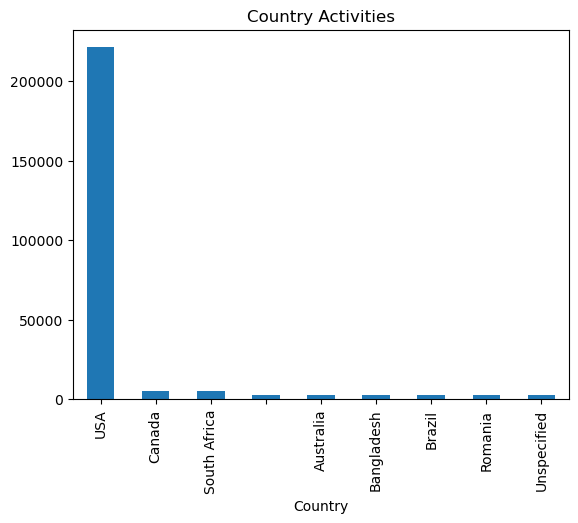

In [19]:
clean_df.groupby('Country').size().sort_values(ascending=False).plot.bar(title='Country Activities');

# USA States (Highest and Lowest Sightings)

In [22]:
usa_data = clean_df[clean_df['Country'] == 'USA']
usa_data

,Date Occured,Time Occured,City,State,Country,Shape,Summary
0,02/02/1995,23:00,Shady Grove,OR,USA,,"Man and wife witness very bright, moving light..."
1,02/02/1995,19:15,Denmark,WI,USA,Cone,Many witness strange craft streaking in night ...
2,02/02/1995,20:10,Traverse City,MI,USA,,4 children report seeing disc above them; bath...
3,12/13/1994,18:55,Murphy,NC,USA,,"Woman reports seeing strange, lighted obj. wit..."
4,02/03/1995,23:25,Fontana,CA,USA,,8 adults witness five lights in northern sky f...
...,...,...,...,...,...,...,...
245525,02/27/2024,21:00,,-,USA,Orb,Multiple orbs of light over the Pacific Ocean ...
245526,02/27/2024,08:10,Escondido,CA,USA,Other,The plane like object turned around in mid air...
245527,02/26/2024,22:10,Los Angeles,CA,USA,Orb,Just past the Federal building silent object w...
245528,02/26/2024,21:40,New York,NY,USA,Light,"Light flew by then went away , small almost on..."


In [26]:
usa_data = clean_df[clean_df['Country'] == 'USA']

# Create a new DataFrame from the filtered data
usa_df = pd.DataFrame(usa_data)
usa_df

,Date Occured,Time Occured,City,State,Country,Shape,Summary
0,02/02/1995,23:00,Shady Grove,OR,USA,,"Man and wife witness very bright, moving light..."
1,02/02/1995,19:15,Denmark,WI,USA,Cone,Many witness strange craft streaking in night ...
2,02/02/1995,20:10,Traverse City,MI,USA,,4 children report seeing disc above them; bath...
3,12/13/1994,18:55,Murphy,NC,USA,,"Woman reports seeing strange, lighted obj. wit..."
4,02/03/1995,23:25,Fontana,CA,USA,,8 adults witness five lights in northern sky f...
...,...,...,...,...,...,...,...
245525,02/27/2024,21:00,,-,USA,Orb,Multiple orbs of light over the Pacific Ocean ...
245526,02/27/2024,08:10,Escondido,CA,USA,Other,The plane like object turned around in mid air...
245527,02/26/2024,22:10,Los Angeles,CA,USA,Orb,Just past the Federal building silent object w...
245528,02/26/2024,21:40,New York,NY,USA,Light,"Light flew by then went away , small almost on..."


In [34]:
datatypes = df.dtypes 
datatypes

Occurred        object
City            object
State           object
Country         object
Shape           object
Summary         object
Reported        object
Date Occured    object
Time Occured    object
dtype: object

In [35]:
usa_df['Date Occured'] = pd.to_datetime(usa_df['Date Occured'])
print(usa_df.dtypes)

Date Occured    datetime64[ns]
Time Occured            object
City                    object
State                   object
Country                 object
Shape                   object
Summary                 object
Year                     int64
dtype: object


# USA- Shapes

# NOTES

<Axes: title={'center': 'Yearly Activities'}, xlabel='Year'>

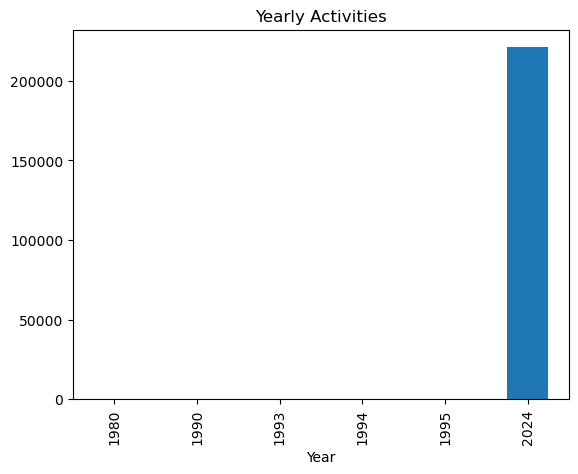

In [36]:
# Convert the "Date Occured" column to datetime format
usa_df['Date Occured'] = pd.to_datetime(usa_df['Date Occured'])

# Extract the year from the "Date Occured" column
usa_df['Year'] = usa_df['Date Occured'].dt.year

# Group the DataFrame by year and calculate the total values for each year
yearly_counts = usa_df.groupby('Year').size()

# Plot the total values for each year
yearly_counts.plot.bar(title='Yearly Activities')

<Axes: title={'center': 'Dates Activities'}, xlabel='Date Occured'>

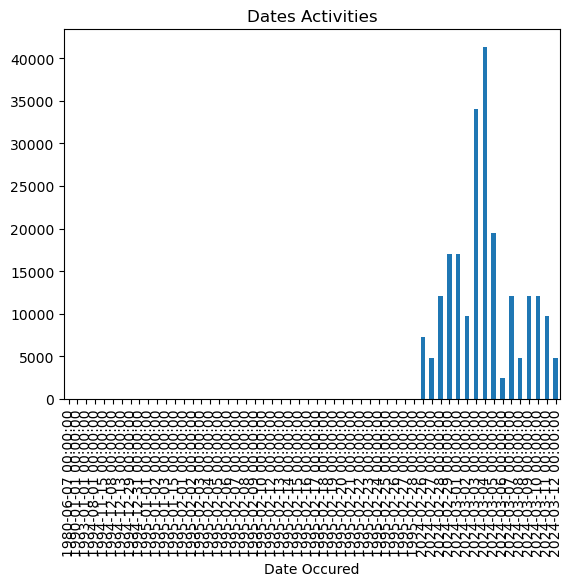

In [37]:
date_counts = usa_df.groupby('Date Occured').size()

# Plot the total values for each date
date_counts.plot.bar(title='Dates Activities')

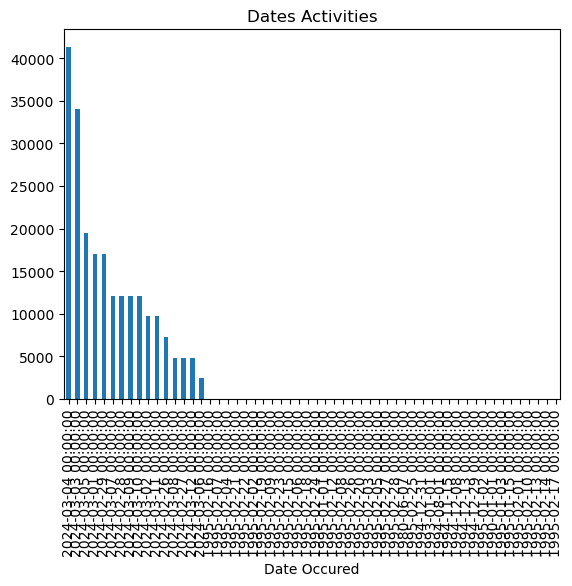

In [38]:
usa_df.groupby('Date Occured').size().sort_values(ascending=False).plot.bar(title='Dates Activities');

In [25]:
clean_df["value"] = pd.to_numeric(clean_df["value"])
clean_df["age"] = pd.to_numeric(df2["age"])

cm = sns.light_palette("green", as_cmap=True)
df2.style.background_gradient(cmap=cm, subset=["value", "age"])

NameError: name 'df2' is not defined

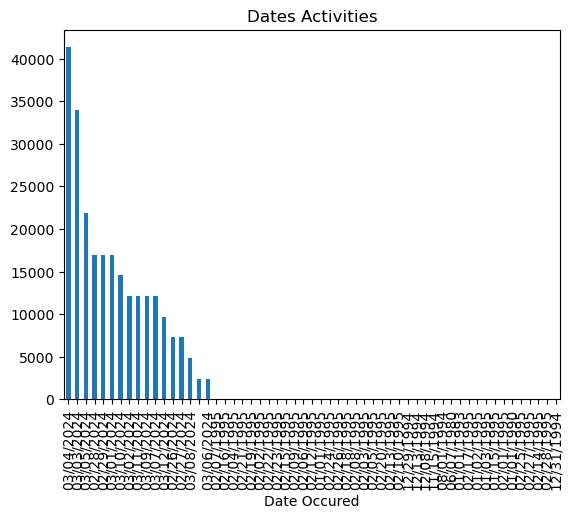

In [23]:
clean_df.groupby('Date Occured').size().sort_values(ascending=False).plot.bar(title='Dates Activities');

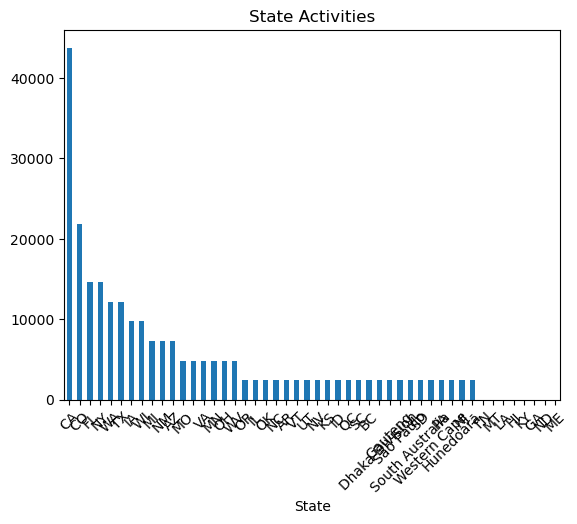

In [24]:
#This takes all states from all countries...
clean_df.groupby('State').size().sort_values(ascending=False).plot.bar(title='State Activities', rot=45);